First Import All the Necessary Libraries.
1. We will need numpy
2. We will need pandas dataframe
3. We will need matplot lib for plotting
4. Seaborn for enhanced plotting

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [85]:
# Load the loan dataset
loan_df = pd.read_csv("loan.csv")

/var/folders/g9/53jszm6j65g8gg8tsz0q2c480000gn/T/ipykernel_7858/1886144750.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv("loan.csv")


In [86]:
#use head to have a look at 5 rows and get basic understanding of data
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [87]:
#let us see how many rows are we having using shape
loan_df.shape

(39717, 111)

From the head() we can see a lot of NaN (Null values). Let us try to get a sense of how many null values are there in different columns

In [88]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

We can see from the above that there are columns like tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit etc which have all values as null. So now lets remove columns which have all null values because those are not of any use for our analysis

In [89]:
loan_df.dropna(axis = 1, inplace = True, how = 'all' )

In [90]:
loan_df.shape

(39717, 57)

Now we can see that the number of columns have come down to 57.Now let us still try to see if there are columns with large number of null values because they will not be useful to our analysis as well

In [91]:
loan_df.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

next_pymnt_d, mths_since_last_record, mths_since_last_delinq, desc have very large number of null values. Let us drop them

In [92]:
loan_df.drop(['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc'], axis = 1, inplace = True)

In [93]:
loan_df.shape

(39717, 53)

Now let us use nunique() to understand the different values in various columns

In [94]:
loan_df.nunique(axis=0)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

Having looked at the dictionary, the member id and id are not of any value during the analysis. Also we can see that columns like pymnt_plan, initial_list_status, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, tax_liens have only a single value and hence will not be useful to the analysis. Lets drop those columns
- Also from the above we can see that there are 39717 ids which is equal to the number of rows,  which means there are no duplicate rows

In [95]:
loan_df.drop(['id', 'member_id', 'pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis = 1, inplace = True)

In [96]:
loan_df.shape

(39717, 42)

In [97]:
loan_df.nunique(axis=0)

loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc                     82
out_prncp                   1137
out_prncp_

Now that we have removed the unneccessary columns, we will have to now understand whether the columns have proper data in proper format. If not we will have to understand that and correct it so that we can do proper analysis

In [98]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [99]:
loan_df.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [100]:
loan_df.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

In [101]:
loan_df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [102]:
loan_df.revol_util.value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

We can see a few things
- revol_util & int_rate are percentages and we can strip the % and make it numeric
- Term & emp_length are in months and years and can be made numeric

In [103]:
loan_df['revol_util'] =loan_df.revol_util.apply(lambda x: float(str(x).rstrip('%')))
loan_df['int_rate'] =loan_df.int_rate.apply(lambda x: float(str(x).rstrip('%')))

In [104]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [105]:
loan_df.emp_length.fillna('0',inplace=True)
loan_df['emp_length']=loan_df.emp_length.str.extract('(\d+)')
loan_df['term']=loan_df.term.str.extract('(\d+)')

In [106]:
loan_df.emp_length.value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64

In [107]:
loan_df.term.value_counts()

36    29096
60    10621
Name: term, dtype: int64

Now that we have cleaned up the data lets try to make some basic understanding of the data so that will help us in the next steps of finding co-relations and patterns 

# Loan Purpose

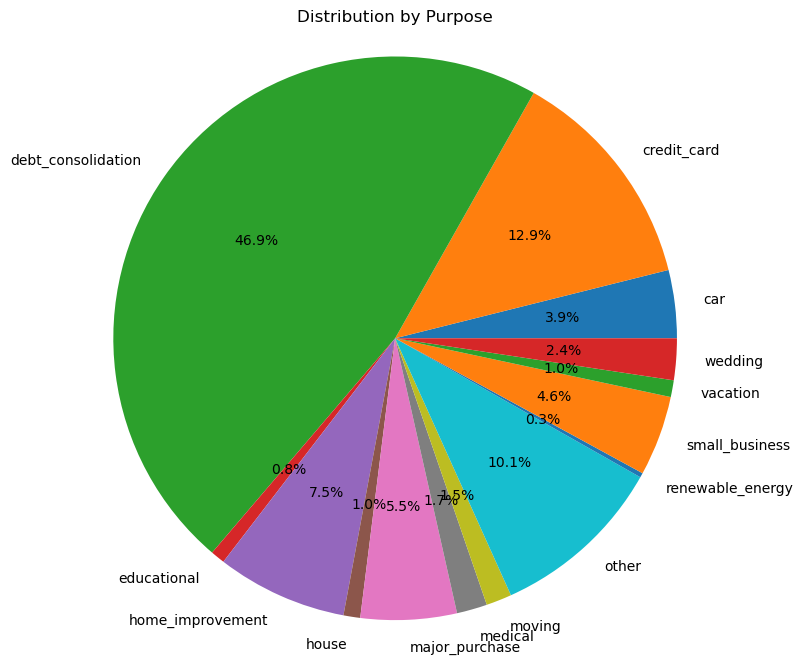

In [126]:
# Group by Loan Purpose
group_by_purpose = loan_df.groupby("purpose").size().reset_index(name="Count")

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(group_by_purpose["Count"], labels=group_by_purpose["purpose"], autopct='%1.1f%%')
plt.title("Distribution by Purpose")
plt.axis('equal')

# Show the pie chart
plt.show()

# Loan Status Distribution

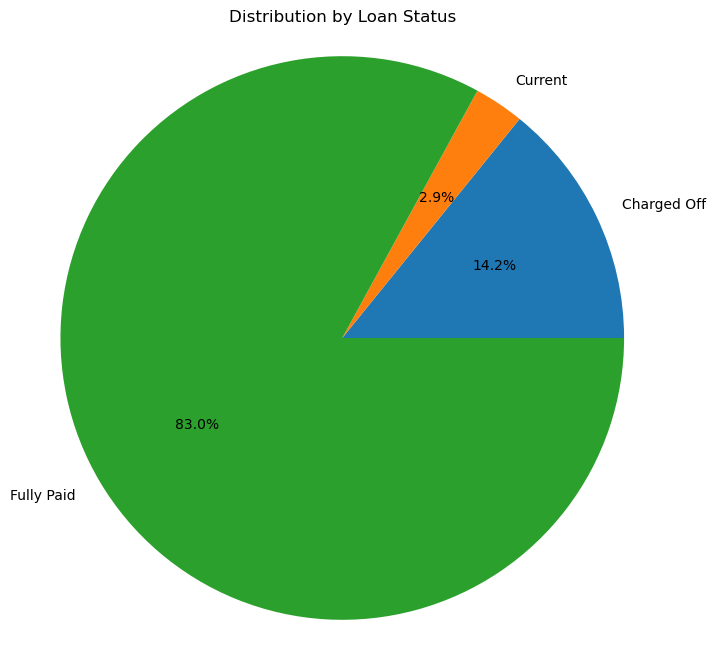

In [127]:
# Group by Loan Status
group_by_loan_status = loan_df.groupby("loan_status").size().reset_index(name="Count")

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(group_by_loan_status["Count"], labels=group_by_loan_status["loan_status"], autopct='%1.1f%%')
plt.title("Distribution by Loan Status")
plt.axis('equal')

# Show the pie chart
plt.show()

From the above two graphs we can clearly derive some insights
***Observation***
- Top two loan purposes are debt_consolidation and credit card
- 83 percent of loans are fully paid. 14.2 percent loans are charged off. A very small percentage is current

# Univariate Analysis

First lets try to understand the loan_amnt and funded amnt

In [148]:
loan_df.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

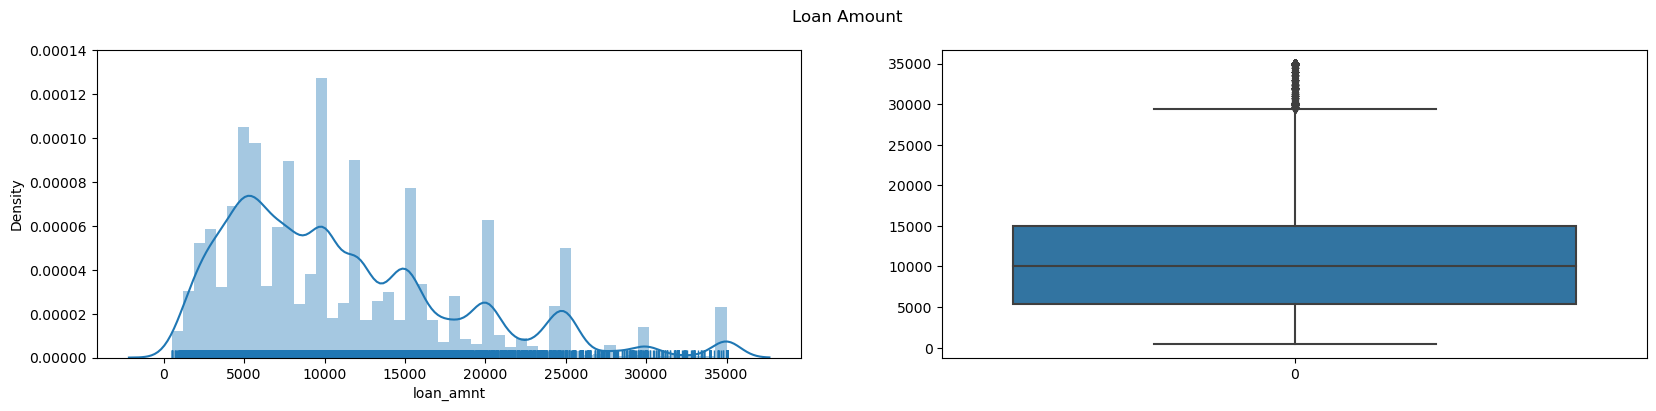

In [171]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)

#Histogram plot
sns.distplot(a=loan_df.loan_amnt, rug=True)
plt.subplot(1,2,2)

#Box plot
sns.boxplot(data=loan_df.loan_amnt)

#Title for our plot
plt.suptitle('Loan Amount')
plt.show()

***Observation***
- Most of the loans were under amount under 15k. Median was 10k
- Very few people took loan more than 30k

Next lets try to understand the funded amount

In [147]:
loan_df.funded_amnt.describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [160]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)

#Histogram plot
sns.distplot(a=loan_df.funded_amnt, rug=True)
plt.subplot(1,2,2)

boxprops = dict(facecolor='red', edgecolor='black')

#Box plot
sns.boxplot(data=loan_df.funded_amnt, boxprops)

#Title for our plot
plt.suptitle('Loan Amount')
plt.show()

SyntaxError: positional argument follows keyword argument (3921679497.py, line 11)

***Observation***
- The loan amount and funded amount graph looks very similiar
- Which means most of the loans were approved and funded

Now let us analyse the annual income

In [151]:
loan_df.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<Axes: >

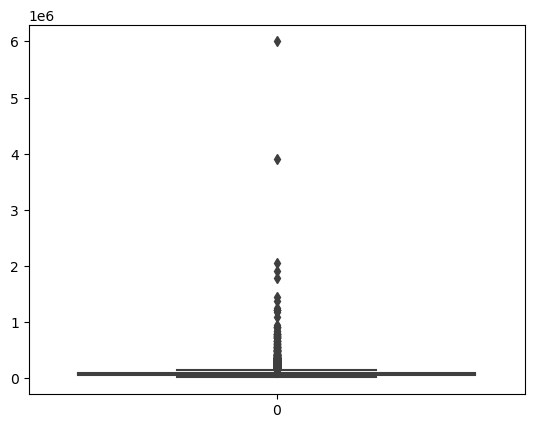

In [153]:
sns.boxplot(loan_df.annual_inc)

This plot is very difficult to make sense. Looking at the output of describe() it is very clear that there are a lot of outliers. Lets remove the outliers by taking only the 99 percentile data

In [154]:
loan_df = loan_df[loan_df.annual_inc < loan_df.annual_inc.quantile(0.99)]

<Axes: >

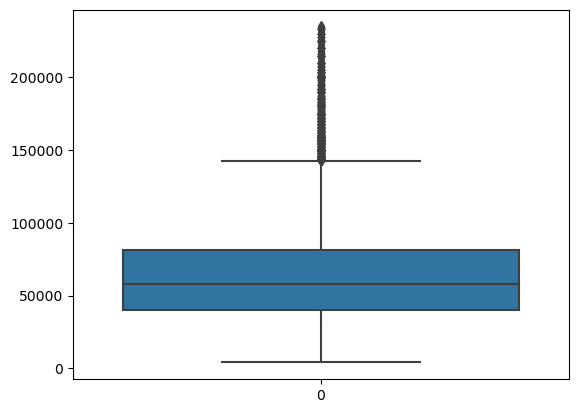

In [155]:
sns.boxplot(loan_df.annual_inc)

This is much more clear visualization. lets use describe to find the mean

In [156]:
loan_df.annual_inc.describe()

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64

***Observation***
- The median annual income is 58k and the meadian loan amount was around 10k

In [158]:
loan_df.int_rate.describe()

count    39319.000000
mean        12.006142
std          3.717367
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64

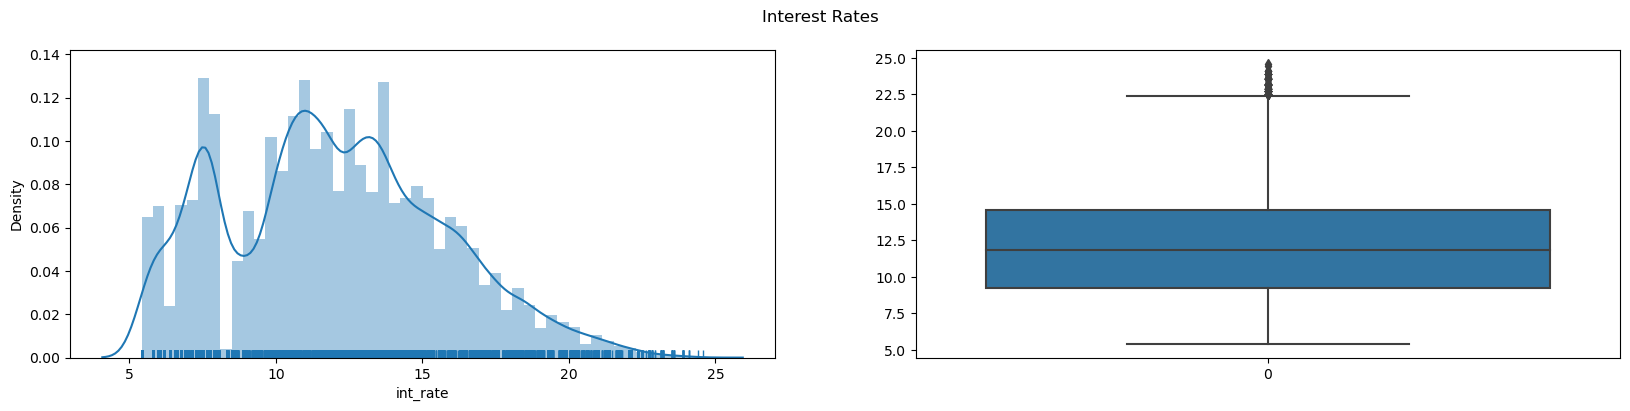

In [159]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)

#Histogram plot
sns.distplot(a=loan_df.int_rate, rug=True)
plt.subplot(1,2,2)

#Box plot
sns.boxplot(data=loan_df.int_rate)

#Title for our plot
plt.suptitle('Interest Rates')
plt.show()

***Observation***
- The interest rates ranges are mostly between 9 percent and 14 percent
- The median is around 12 percent as can be seen from the graphs